Comparison between NAO data from NCAR and the analysis done both with aqua libraries and cdo-bindings

In [19]:
import cdo
import cftime
import datetime
import index
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from cdotesting import *
from tools import *

# Teleconnection config details
diagname  = 'teleconnections'
machine   = 'wilma'
telecname = 'NAO'

# Opening yml files
config   = load_config(machine)
namelist = load_namelist(diagname)

fieldname = namelist[telecname]['field']
print(fieldname)
infile = config[diagname][telecname]['input']
print(infile)

msl
/work/datasets/obs/ERA5/mean_sea_level_pressure/mon/ERA5_mean_sea_level_pressure_mon_0.25x0.25_sfc_1979-2021.nc


In [8]:
# cdo
nao_cdo = station_based_cdo(infile,namelist,telecname)

In [12]:
# libraries
field = xr.open_mfdataset(infile)[fieldname]
nao_lib = index.station_based_index(field,namelist,telecname=telecname)

/work/users/mnurisso/mambaforge/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


In [15]:
# ncar data
ncar_path = 'data/nao_station_seasonal.txt'
nao_ncar = np.genfromtxt(ncar_path,skip_header=2)

year = nao_ncar[:,0]
month_data = nao_ncar[:, 1:]
time = xr.cftime_range(start=str(int(year[0])),periods=12*len(year),freq='M',calendar='standard')
month_data = month_data.reshape(-1)
nao_ncar = xr.DataArray(month_data, coords=[time], dims=['time'], name='monthly_data')

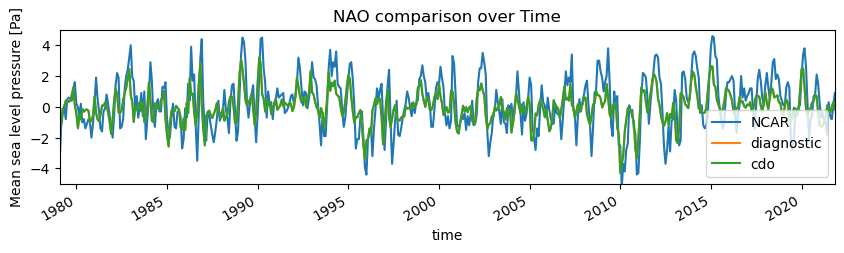

In [26]:

time_vals = np.array(time.values)

# Convert to datetime objects
datetimes = [np.datetime64(t).astype(datetime.datetime) for t in time_vals]

# Plot with matplotlib
fig = plt.figure(figsize=(10,2))
plt.plot(datetimes, nao_ncar.values,label='NCAR')

plt.xlim(datetime.datetime(1979, 1, 31, 0, 0),datetime.datetime(2021, 10, 31, 0, 0))
plt.ylim(-5,+5)

nao_lib.plot(label='diagnostic')
nao_cdo.msl.plot(label='cdo')
plt.legend()
plt.title('NAO comparison over Time')
plt.show()
